#### <font color = 'blue'>**1.** Déterminer $\widehat{\beta}_1$ et $\widehat{\beta}_2$.</font>

On a:
\begin{align*}
\dfrac{\partial S}{\partial \beta_1} &= 2\sum_{i=1}^n(\beta_1 + \beta_2t - X_i) = 2\left(n\beta_1+\beta_2\sum_{i=1}^n t_i - \sum_{i=1}^nX_i\right), \\
\dfrac{\partial S}{\partial \beta_2} &= 2\sum_{i=1}^n(\beta_1 + \beta_2t - X_i)t_i = 2\left(\beta_1\sum_{i=1}^nt_i + \beta_2\sum_{i=1}^n t_i^2 - \sum_{i=1}^nX_it_i\right).
\end{align*}

Donc, la matrice hessienne de $S(\beta_1,\beta_2)$ est

\begin{equation*}
D^2S(\beta_1,\beta_2) =
\begin{pmatrix}
\dfrac{\partial^2 S}{\partial \beta_1^2} & \dfrac{\partial^2 S}{\partial \beta_1\partial \beta_2} \\
\dfrac{\partial^2 S}{\partial \beta_2\partial \beta_1} & \dfrac{\partial^2 S}{\partial \beta_2^2}
\end{pmatrix}
=
\begin{pmatrix}
2n & 2\sum_{i=1}^nt_i \\
2\sum_{i=1}^nt_i & 2\sum_{i=1}^nt_i^2
\end{pmatrix}
\end{equation*}

Parce qu'il existe au moins $i\neq j$ tels que $t_i \neq t_j$, on a $D^2S(\beta_1,\beta_2)$ est définie positive. Donc $S(\beta_1,\beta_2)$ est une fonction convexe. Donc, on peut obtenir $\widehat{\beta}_1$, $\widehat{\beta}_2$ en cherchant la solution unique des équations:
\begin{equation*}
\begin{cases}
n\beta_1+\beta_2\sum_{i=1}^n t_i - \sum_{i=1}^nX_i = 0\\
\beta_1\sum_{i=1}^nt_i + \beta_2\sum_{i=1}^n t_i^2 - \sum_{i=1}^nX_it_i = 0\\
\end{cases}
\end{equation*}

Après avoir résolu ce système d'équations, on a les résultats:
\begin{align*}
\boxed{\widehat{\beta}_2=\frac{\sum_{i=1}^n (t_i -\bar{t})X_i}{\sum_{i=1}^n (t_i -\bar{t})^2}}\  et\  \boxed{\widehat{\beta}_1=\bar{X}-\widehat{\beta}_2\bar{t}}
\end{align*}

#### <font color = 'blue'>**2.** Visualiser des données</font>


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [25]:
#lire la base de données
file = open("GLB.Ts+dSST.txt", "r")
lines = file.readlines()
file.close()

In [26]:
#liste des années
year = [i for i in range(1880,2021)]

#la liste des anomalies de la température
tp_values =[]
for i in range(8,len(lines)-11):
    v=lines[i][69:72]
    if v != '' and v!='J-D':
        tp_values.append(int(lines[i][69:72])/100)

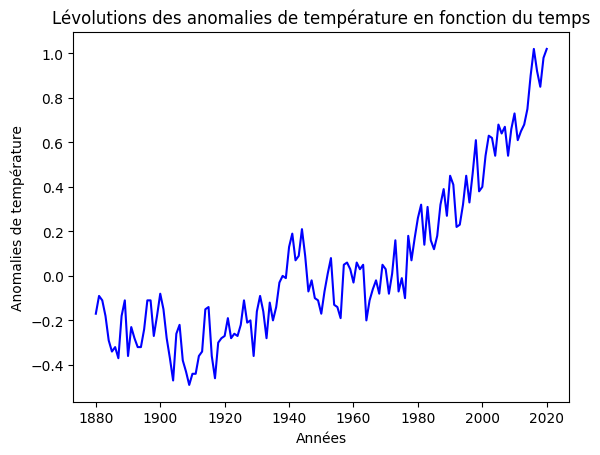

In [27]:
#Visualiser des données
plt.plot(year,tp_values,color='blue')
plt.title('Lévolutions des anomalies de température en fonction du temps')
plt.xlabel('Années')
plt.ylabel('Anomalies de température')
plt.show()

#### <font color = 'blue'>**3.** Estimer $\widehat{\beta}_1$, $\widehat{\beta}_2$ et $\widehat{\sigma}^2$.</font>



In [ ]:
#Regrouper les données avec une période de 30 ans
n=30
T=[]
X=[]
for j in range(0,len(year)-n,10):
    X.append(tp_values[j:j+n])
    T.append(year[j:j+n])

#Estimateur de beta1, beta2 et sigma
beta1=[]
beta2=[]
sigma_square=[]

for j in range(len(T)):
    t_bar=np.mean(T[j])
    tab1=[(T[j][i]-t_bar)*X[j][i] for i in range(len(T[j]))]
    tab2=[(T[j][i]-t_bar)**2 for i in range(len(T[j]))]
    val_beta2=np.sum(tab1)/np.sum(tab2)
    val_beta1=np.mean(X[j])-val_beta2*t_bar
    val_sigma=np.sum([(X[j][i]-(val_beta1+val_beta2*T[j][i]))**2 for i in range(len(T[j]))])/(len(T[j])-2)

    beta1.append(val_beta1)
    beta2.append(val_beta2)
    sigma_square.append(val_sigma)

In [ ]:
print('beta1 = ')
print(np.array(beta1))

beta1 = 
[  9.79501891   7.21383982  -5.21168261 -20.09775454 -23.64374564
  -6.19078828   8.55588432  -8.92089878 -25.54276974 -33.28171746
 -32.9546155  -42.29929551]


In [ ]:
print('beta2 = ')
print(np.array(beta2))

beta2 = 
[-0.0053059  -0.00394216  0.00256952  0.01032481  0.01216908  0.00316352
 -0.00438265  0.00453393  0.01297887  0.0168832   0.01672747  0.02139933]


In [ ]:
print('sigma_carre = ')
print(np.array(sigma_square))

sigma_carre = 
[0.01155561 0.01283545 0.0127892  0.0072982  0.01112009 0.01461765
 0.01043682 0.00910426 0.01008309 0.0100356  0.00860526 0.00874056]


#### <font color = 'blue'>**4.** Déterminer les intervalles de niveau de couverture 0.95.</font>

Pour $\widehat{\beta}_j$, on a $\dfrac{\widehat{\beta}_j - \beta_j}{\widehat{\sigma}_j}$ suit la loi de Student à $n-2$ degrés de liberté , donc,
\begin{equation*}
\mathbb{P}\left(-t^{n-2}_{0.975}\leq \dfrac{\widehat{\beta}_j - \beta_j}{\widehat{\sigma}_j} \leq t^{n-2}_{0.975}\right) = 95\%
\end{equation*}
Donc, on peut choisir l'intervalle de couverture $\left[\widehat{\beta}_i -\widehat{\sigma}_jt^{n-2}_{0.025}, \widehat{\beta}_i + \widehat{\sigma}_jt^{n-2}_{0.025}\right]$ pour $\beta_j$.

Pour $\sigma_i$, on fait le même raisonnement et on obtiens l'intervalle de couverture : $\left[\dfrac{(n-2)\widehat{\sigma}^2}{\chi^2_{0.975}(n-2)}, \dfrac{(n-2) \widehat{\sigma}^2}{\chi^2_{0.025}(n-2)}\right]$.

In [ ]:
# Calcul de sigma1 et sigma2
sigma1_square=[]
sigma2_square=[]

i=0
for j in range(len(T)):
    t_bar=np.mean(T[j])
    tab1=[(T[j][i])**2 for i in range(len(T[j]))]
    tab1=[(T[j][i]-t_bar)**2 for i in range(len(T[j]))]

    sigma1_square.append(sigma_square[j]*np.sum(tab1)/(len(T[j])*np.sum(tab2)))
    sigma2_square.append(sigma_square[j]/np.sum(tab2))
    i+=1

In [30]:
#Calcul des quantiles
a = stats.t(df=n-2).ppf((0.025, 0.975))[1]
b = stats.chi2(df=n-2).ppf((0.025, 0.975))[1]
c = stats.chi2(df=n-2).ppf((0.025, 0.975))[0]

#Estimation des intervalles de couverture
beta1_interval = []
beta2_interval = []
sigma_square_interval = []

for i in range(len(beta1)):
    beta_1_lo = beta1[i] - a * np.sqrt(sigma1_square[i])
    beta_1_up = beta1[i] + a * np.sqrt(sigma1_square[i])
    beta1_interval.append([beta_1_lo, beta_1_up])

    beta_2_lo = beta2[i] - a * np.sqrt(sigma2_square[i])
    beta_2_up = beta2[i] + a * np.sqrt(sigma2_square[i])
    beta2_interval.append([beta_2_lo, beta_2_up])

    sigma_lo = (n - 2) * sigma_square[i] / b
    sigma_up = (n - 2) * sigma_square[i] / c
    sigma_square_interval.append([sigma_lo, sigma_up])

In [ ]:
print('beta1_interval = ')
print(np.array(beta1_interval))

beta1_interval = 
[[  9.75481649   9.83522133]
 [  7.17146956   7.25621008]
 [ -5.25397648  -5.16938874]
 [-20.129704   -20.06580508]
 [-23.68318318 -23.60430811]
 [ -6.23600452  -6.14557205]
 [  8.5176776    8.59409103]
 [ -8.95658314  -8.88521441]
 [-25.58032342 -25.50521607]
 [-33.3191826  -33.24425232]
 [-32.98930816 -32.91992284]
 [-42.33425986 -42.26433117]]


In [ ]:
print('beta2_interval = ')
print(np.array(beta2_interval))

beta2_interval = 
[[-9.95065190e-03 -6.61138977e-04]
 [-8.83737450e-03  9.53058598e-04]
 [-2.31686878e-03  7.45591216e-03]
 [ 6.63354847e-03  1.40160622e-02]
 [ 7.61269073e-03  1.67254628e-02]
 [-2.06050875e-03  8.38753879e-03]
 [-8.79683208e-03  3.15373080e-05]
 [ 4.11159843e-04  8.65669333e-03]
 [ 8.64012931e-03  1.73176015e-02]
 [ 1.25546965e-02  2.12117107e-02]
 [ 1.27192841e-02  2.07356659e-02]
 [ 1.73597533e-02  2.54389119e-02]]


In [ ]:
print('sigma_square_interval = ')
print(np.array(sigma_square_interval))

sigma_square_interval = 
[[0.04852466 0.08269777]
 [0.05389896 0.09185689]
 [0.05370478 0.09152595]
 [0.0306468  0.05222957]
 [0.04669578 0.07958092]
 [0.06138282 0.10461121]
 [0.04382658 0.07469111]
 [0.03823086 0.06515465]
 [0.04234119 0.07215965]
 [0.04214178 0.0718198 ]
 [0.03613544 0.06158355]
 [0.03670362 0.06255185]]


#### <font color = 'blue'>**5.** Visualiser les différentes droites de régression $\widehat{X_i}=\widehat{\beta}_1+\widehat{\beta}_2 t_i$ et les intervalles de confiance. </font>

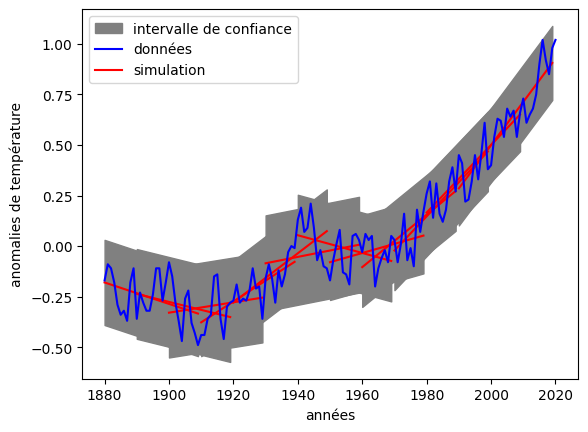

In [ ]:
#Calcul de la régression linéaire par période de 30 ans

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

grey_patch = mpatches.Patch(color='grey', label='intervalle de confiance')
blue_line = mlines.Line2D([], [], color='blue',markersize=15, label='données')
red_line = mlines.Line2D([], [], color='red', markersize=15, label='simulation')

q = stats.norm.ppf((0.025, 0.975))[1]
for j in range(len(T)):
    v=[beta1[j]+beta2[j]*T[j][i] for i in range(len(T[j]))]
    v_inf=[-q*np.sqrt(sigma_square[j])+beta1[j]+beta2[j]*T[j][i] for i in range(len(T[j]))]
    v_sup=[+q*np.sqrt(sigma_square[j])+beta1[j]+beta2[j]*T[j][i] for i in range(len(T[j]))]
    plt.plot(T[j],v,'red')
    plt.fill_between(T[j],v_inf,v_sup,color='gray')
plt.plot(year,tp_values,'blue',label='données')
plt.xlabel('Années')
plt.ylabel('Anomalies de température')
plt.legend(handles=[grey_patch,blue_line,red_line])
plt.show()

#### <font color = 'blue'>**6.** Visualiser pour chaque intervalle les résidus de standardisés </font>#

On visualise pour chaque intervalle les résidues standardisés
$$ t_i = \frac{\hat{X}_i - X_i}{\hat{\sigma}\sqrt{1 - h_{i}}} $$
où  $h_{i} = \frac{nt_i^2 - 2t_i\sum t_i + \sum t_i^2}{n\sum_{i=1}^{n} t_i^{2}-(\sum_{i=1}^{n} t_i)^{2}}$

#### <font color = 'blue'>**7.** Conclure </font>#



Apres avoir trace le graphe des ti (erreurs standardisees), si celui ci respecte une loi normale, alors la regression est bien faite